<a href="https://colab.research.google.com/github/mariahirit/RandomForestRegressor/blob/master/RandomForestRegressor%2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1377]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("j0002_train.csv")
df

,feature1,feature2,feature3,feature4,feature5,feature6,target
0,0.474335,0.881640,-2.050543,-1.251935,-1.035151,-1.934367,4
1,-1.034675,1.741801,-1.660629,-1.555989,-0.337553,-2.473838,0
2,-0.563221,-0.688381,-0.318415,-1.845172,0.352366,-0.912928,1
3,-1.268179,2.770688,1.054193,2.830389,0.395093,0.677715,3
4,-1.216380,-0.391267,-2.898931,-0.913074,-2.171857,-2.367490,0
...,...,...,...,...,...,...,...
2095,-0.947002,0.174969,-0.180249,0.118236,-0.143420,-0.359509,0
2096,-1.224148,0.029956,0.536684,0.888406,0.119460,0.378946,1
2097,-0.847593,1.538574,0.962409,1.966467,0.379934,0.737907,3
2098,1.472437,1.187695,1.015766,-1.103522,1.586722,0.182569,4


In [1378]:
df_test=pd.read_csv("j0002_X_test.csv")
df_test

,feature1,feature2,feature3,feature4,feature5,feature6
0,0.943723,-2.985473,-0.938218,3.580261,-3.038106,2.080338
1,-0.899819,1.295568,1.274513,0.718186,1.117035,0.463068
2,0.293281,-0.099317,1.874902,-0.589582,1.828441,1.011596
3,-1.134804,0.888585,-1.464499,-1.183056,-0.525729,-1.963822
4,-0.909240,1.575797,0.697212,1.197092,0.486185,0.222644
...,...,...,...,...,...,...
895,0.196663,-0.866822,-1.132836,-0.700726,-0.886717,-0.680351
896,1.306644,0.543675,0.555275,-0.518374,0.796236,0.297632
897,-1.009089,0.359536,-2.253087,0.125687,-1.881437,-1.704497
898,-0.339431,-0.560891,-0.256911,-1.576351,0.317480,-0.742085


In [1379]:
df.head()

,feature1,feature2,feature3,feature4,feature5,feature6,target
0,0.474335,0.881640,-2.050543,-1.251935,-1.035151,-1.934367,4
1,-1.034675,1.741801,-1.660629,-1.555989,-0.337553,-2.473838,0
2,-0.563221,-0.688381,-0.318415,-1.845172,0.352366,-0.912928,1
3,-1.268179,2.770688,1.054193,2.830389,0.395093,0.677715,3
4,-1.216380,-0.391267,-2.898931,-0.913074,-2.171857,-2.367490,0


In [1380]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  2100 non-null   float64
 1   feature2  2100 non-null   float64
 2   feature3  2100 non-null   float64
 3   feature4  2100 non-null   float64
 4   feature5  2100 non-null   float64
 5   feature6  2100 non-null   float64
 6   target    2100 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 115.0 KB


In [1381]:
df.isna()

,feature1,feature2,feature3,feature4,feature5,feature6,target
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2095,False,False,False,False,False,False,False
2096,False,False,False,False,False,False,False
2097,False,False,False,False,False,False,False
2098,False,False,False,False,False,False,False


In [1382]:
df.shape

(2100, 7)

In [1383]:
df.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,target
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,-0.204656,0.199249,-0.378140,-0.206425,-0.186419,-0.433229,1.980476
std,1.543613,1.614024,1.450548,1.442225,1.501573,1.188791,1.410537
min,-6.683655,-5.383371,-6.147055,-5.653594,-5.912521,-4.433189,0.000000
25%,-1.171340,-0.877386,-1.365990,-1.259403,-1.211685,-1.131944,1.000000
50%,-0.443868,0.320507,-0.439745,-0.176504,-0.195751,-0.406754,2.000000
75%,0.890023,1.321430,0.662898,0.866879,0.851843,0.348593,3.000000
max,4.565547,6.700133,4.157518,4.371912,5.068783,4.016324,4.000000


In [1384]:
df.isnull().sum()

feature1    0
feature2    0
feature3    0
feature4    0
feature5    0
feature6    0
target      0
dtype: int64

In [1385]:
df_test.isnull().sum()

feature1    0
feature2    0
feature3    0
feature4    0
feature5    0
feature6    0
dtype: int64

In [1386]:
df.keys()

Index(['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6',
       'target'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b661fc790>,
      dtype=object)

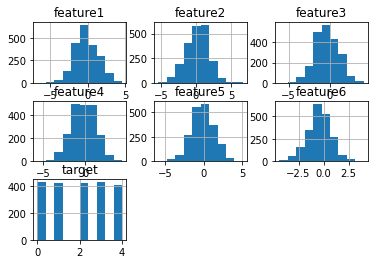

In [1387]:
df.hist()

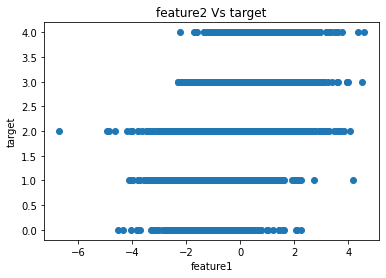

In [1388]:
plt.scatter(x = df['feature1'], y=df['target'])
plt.title('feature2 Vs target')
plt.xlabel('feature1')
plt.ylabel('target')
plt.show()

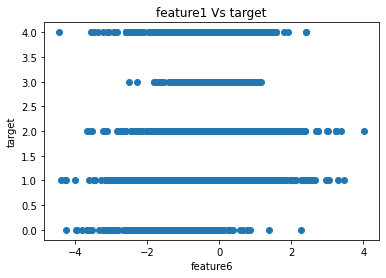

In [1389]:
plt.scatter(x = df['feature6'], y=df['target'])
plt.title('feature1 Vs target')
plt.xlabel('feature6')
plt.ylabel('target')
plt.show()

In [1390]:
df.feature1

0       0.474335
1      -1.034675
2      -0.563221
3      -1.268179
4      -1.216380
          ...   
2095   -0.947002
2096   -1.224148
2097   -0.847593
2098    1.472437
2099   -0.083489
Name: feature1, Length: 2100, dtype: float64

In [1391]:
datos_entrenamiento = df.sample(frac=0.8,random_state=0)
datos_entrenamiento

,feature1,feature2,feature3,feature4,feature5,feature6,target
2085,-1.965140,0.415731,-1.750598,1.086303,-1.821127,-1.254534,0
1941,2.711644,-1.240974,-1.182771,-1.977563,-0.533024,-0.484828,3
1727,-0.415458,0.413433,-0.654537,0.999470,-0.876341,-0.213791,0
1170,-1.546493,2.163053,1.827740,1.849207,1.334493,0.851281,3
723,-1.312810,1.151241,2.127648,-1.154532,2.612395,0.134410,4
...,...,...,...,...,...,...,...
1130,-1.599621,3.417978,2.005670,1.239563,2.041648,0.310542,1
945,-1.642473,0.390750,-1.085983,-1.220052,-0.292235,-1.727599,1
1594,0.992689,0.858848,1.733324,-1.985027,2.506192,0.227261,2
163,-2.719151,-0.114582,0.796673,0.329573,0.574969,-0.040848,2


In [1392]:
x_bar=df.feature6[::, np.newaxis]
y_bar=df.target


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


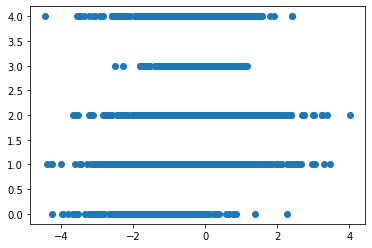

In [1393]:
plt.scatter(x_bar,y_bar)
plt.show()

In [1394]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_bar,y_bar, test_size=0.2)
from sklearn.ensemble import RandomForestRegressor
#bar=RandomForestRegressor( n_estimators=500, max_depth=10)
#bar=RandomForestRegressor( n_estimators=500, bootstrap=False)
#bar=RandomForestRegressor( max_depth=15, bootstrap=False)
#bar=RandomForestRegressor( max_depth=None, bootstrap=False)
bar=RandomForestRegressor( max_depth=15, bootstrap=True)
#bar=RandomForestRegressor( n_estimators=500)

bar.fit(x_train,y_train)
y_pred=bar.predict(x_test)

In [1395]:
bar.fit(x_train,y_train)

RandomForestRegressor(max_depth=15)

In [1396]:
y_pred=bar.predict(x_test)

In [1397]:
import numpy as np
from sklearn.metrics import mean_squared_error
error = np.sqrt(mean_squared_error(x_test, y_pred))
#error = np.arange(mean_squared_error(x_test, y_pred))
print("Error porcentual : %f" % (error*100))

Error porcentual : 264.331580


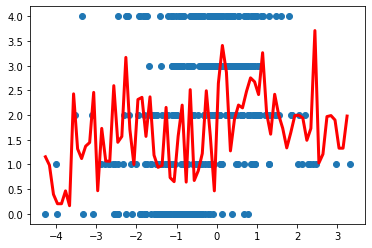

In [1398]:
from numpy.ma.core import reshape
x_grid=np.arange(min(x_test), max(x_test),0.1)
x_grid=x_grid.reshape((len(x_grid),1))
plt.scatter(x_test,y_test)
plt.plot(x_grid,bar.predict(x_grid), color="red", linewidth=3)
plt.show()

In [1399]:
bar.score(x_train, y_train)

0.6436690245425758

In [1400]:
df_test

,feature1,feature2,feature3,feature4,feature5,feature6
0,0.943723,-2.985473,-0.938218,3.580261,-3.038106,2.080338
1,-0.899819,1.295568,1.274513,0.718186,1.117035,0.463068
2,0.293281,-0.099317,1.874902,-0.589582,1.828441,1.011596
3,-1.134804,0.888585,-1.464499,-1.183056,-0.525729,-1.963822
4,-0.909240,1.575797,0.697212,1.197092,0.486185,0.222644
...,...,...,...,...,...,...
895,0.196663,-0.866822,-1.132836,-0.700726,-0.886717,-0.680351
896,1.306644,0.543675,0.555275,-0.518374,0.796236,0.297632
897,-1.009089,0.359536,-2.253087,0.125687,-1.881437,-1.704497
898,-0.339431,-0.560891,-0.256911,-1.576351,0.317480,-0.742085


In [1401]:
df

,feature1,feature2,feature3,feature4,feature5,feature6,target
0,0.474335,0.881640,-2.050543,-1.251935,-1.035151,-1.934367,4
1,-1.034675,1.741801,-1.660629,-1.555989,-0.337553,-2.473838,0
2,-0.563221,-0.688381,-0.318415,-1.845172,0.352366,-0.912928,1
3,-1.268179,2.770688,1.054193,2.830389,0.395093,0.677715,3
4,-1.216380,-0.391267,-2.898931,-0.913074,-2.171857,-2.367490,0
...,...,...,...,...,...,...,...
2095,-0.947002,0.174969,-0.180249,0.118236,-0.143420,-0.359509,0
2096,-1.224148,0.029956,0.536684,0.888406,0.119460,0.378946,1
2097,-0.847593,1.538574,0.962409,1.966467,0.379934,0.737907,3
2098,1.472437,1.187695,1.015766,-1.103522,1.586722,0.182569,4


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b6660cbd0>,
      dtype=object)

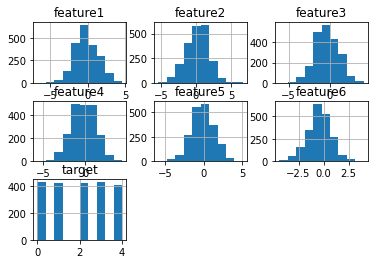

In [1402]:
df.hist()